# Full scans

Here we will analyze the results of the full scans that were performed on the cluster. The scripts to run the scans in parallel on the cluster are located in the `run/` folder, also containing examples of `SLURM` batch files used to launch these scan. The file names are below. These are used to obtain the Monte Carlo chains, which are included in the repository.

Three scans are performed, floating:

- $N_D$, $z_0$ and $\beta$ (`run_nd_z0_beta.py`)
- $N_D$, $N_B$, $z_0$ and $\beta$ (`run_nd_nb_z0_beta_prior.py`)
- $N_D$, $N_B$, $z_0$, $\beta$ and $\alpha$ (`run_nd_nb_z0_beta_alpha_prior.py`)

and the likelihoods between runs including the bulge population are compared with those without it to test preference for the bulge population.

For these runs, we show:

- Best-fit log-evidence
- Best-fit parameters
- For the bulge runs, TS preference with respect to disk-only

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../run/")
from run import run_scan

# Nick's 2PC efficiency

## Float $N_D$, $z_0$ and $\beta$

In [30]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,0]

floated_params = ['N_disk', 'z0', 'beta']
floated_param_priors = [[0,3000000],[0.01,2.0],[1.1,3.0]]

rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [31]:
chains_dir = '../run/chains/rs_nd_2PCNick/'

In [32]:
lge_nd = rs_nd.get_bestfit_lge(chains_dir=chains_dir)

  analysing data from ../run/chains/rs_nd_2PCNick/.txt


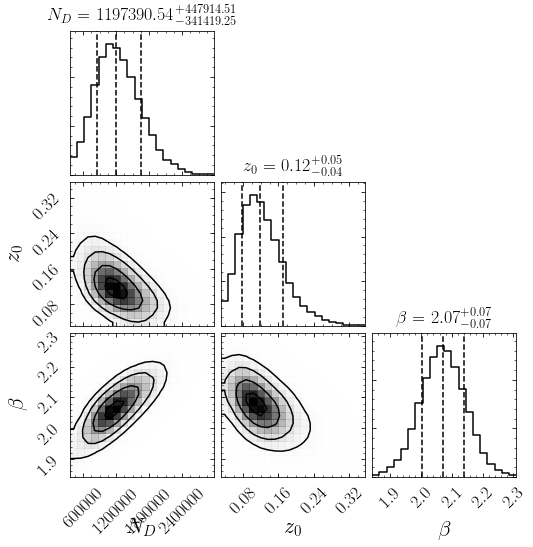

In [33]:
rs_nd.plot_corner(labels = ['$N_D$','$z_0$', '$\\beta$'], chains_dir=chains_dir)
plt.savefig("plots/rs_nd_2PCNick.pdf")

In [34]:
print "Best-fit log-evidence:",2*lge_nd

Best-fit log-evidence: -588.722513368


In [35]:
print "Best-fit parameters"
zip(floated_params, rs_nd.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_2PCNick/.txt


[('N_disk', 1180753.6865648103),
 ('z0', 0.10622830840019848),
 ('beta', 2.0646368270752711)]

## Float $N_D$, $N_B$, $z_0$ and $\beta$

In [36]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk','z0', 'beta']
floated_param_priors = [[0,3000000],[0,3000000],[0.01,2.0],[1.1,3.0]]

In [37]:
rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [38]:
chains_dir = '../run/chains/rs_nd_nb_2PCNick/'

In [39]:
lge_nd_nb = rs_nd_nb.get_bestfit_lge(chains_dir=chains_dir)

  analysing data from ../run/chains/rs_nd_nb_2PCNick/.txt


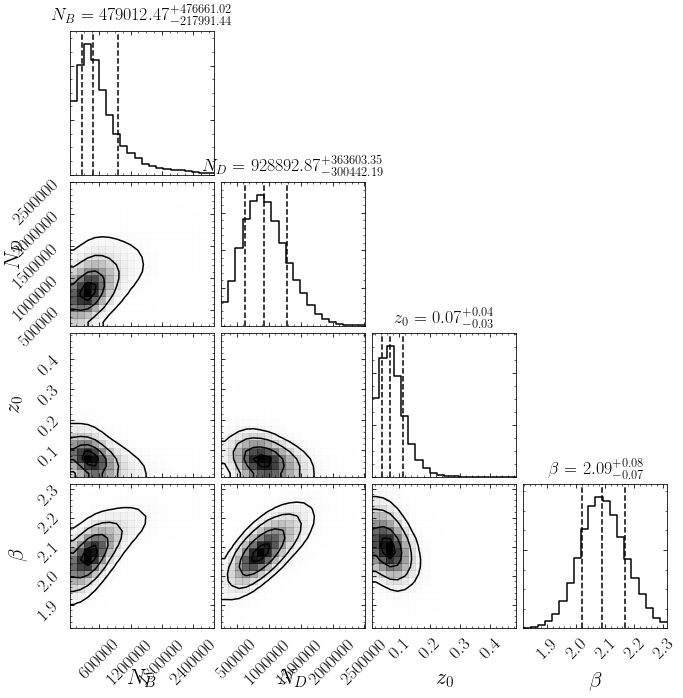

In [40]:
rs_nd_nb.plot_corner(labels = ['$N_B$','$N_D$','$z_0$','$\\beta$'], chains_dir=chains_dir)
plt.savefig("plots/rs_nd_nb.pdf")

In [41]:
print "Best-fit log-evidence:",2*lge_nd_nb

Best-fit log-evidence: -577.347120676


In [42]:
print "Best-fit parameters"
zip(floated_params, rs_nd_nb.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_nb_2PCNick/.txt


[('N_bulge', 364198.92244578135),
 ('N_disk', 794133.96614833304),
 ('z0', 0.070278580636972954),
 ('beta', 2.048392219948032)]

In [43]:
TS = 2*(lge_nd_nb - lge_nd)
print "TS =", TS
print np.sqrt(TS), "sigma"

TS = 11.3753926927
3.37274260694 sigma


# Dan's 2PC efficiency

## Float $N_D$, $z_0$ and $\beta$

In [44]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,0]

floated_params = ['N_disk', 'z0', 'beta']
floated_param_priors = [[0,3000000],[0.01,2.0],[1.1,3.0]]

rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [45]:
chains_dir = '../run/chains/rs_nd_2PCDan/'

In [46]:
lge_nd = rs_nd.get_bestfit_lge(chains_dir=chains_dir)

  analysing data from ../run/chains/rs_nd_2PCDan/.txt


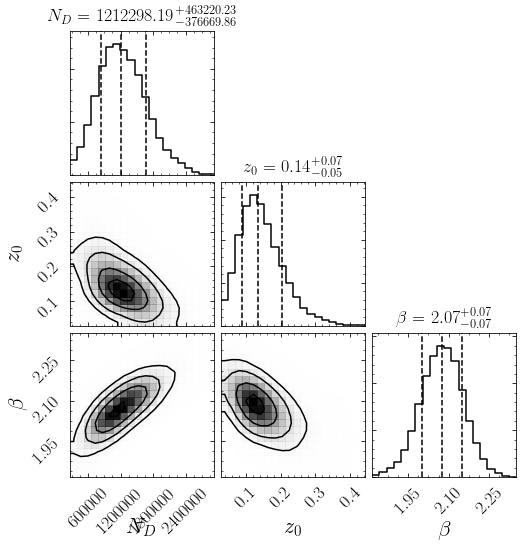

In [47]:
rs_nd.plot_corner(labels = ['$N_D$','$z_0$', '$\\beta$'], chains_dir=chains_dir)
plt.savefig("plots/rs_nd_2PCDan.pdf")

In [48]:
print "Best-fit log-evidence:",2*lge_nd

Best-fit log-evidence: -587.821039091


In [49]:
print "Best-fit parameters"
zip(floated_params, rs_nd.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_2PCDan/.txt


[('N_disk', 1189876.8603730705),
 ('z0', 0.12955489307123505),
 ('beta', 2.0715873127675577)]

## Float $N_D$, $N_B$, $z_0$ and $\beta$

In [50]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk','z0', 'beta']
floated_param_priors = [[0,3000000],[0,3000000],[0.01,2.0],[1.1,3.0]]

In [51]:
rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [52]:
chains_dir = '../run/chains/rs_nd_nb_2PCDan/'

In [53]:
lge_nd_nb = rs_nd_nb.get_bestfit_lge(chains_dir=chains_dir)

  analysing data from ../run/chains/rs_nd_nb_2PCDan/.txt


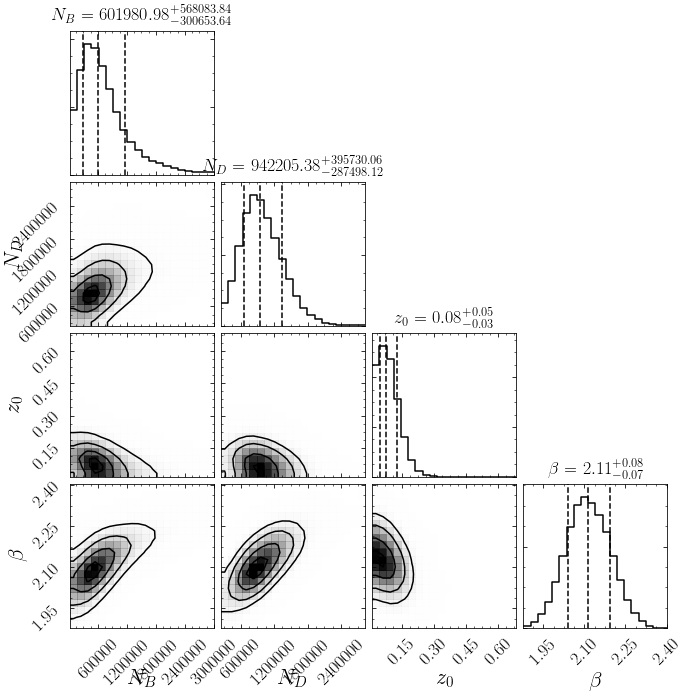

In [54]:
rs_nd_nb.plot_corner(labels = ['$N_B$','$N_D$','$z_0$','$\\beta$'], chains_dir=chains_dir)
plt.savefig("plots/rs_nd_nb_2PCDan.pdf")

In [55]:
print "Best-fit log-evidence:",2*lge_nd_nb

Best-fit log-evidence: -576.405383611


In [56]:
print "Best-fit parameters"
zip(floated_params, rs_nd_nb.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_nb_2PCDan/.txt


[('N_bulge', 426109.38912259293),
 ('N_disk', 781632.06714162393),
 ('z0', 0.073034413506067763),
 ('beta', 2.0650047102209586)]

In [57]:
TS = 2*(lge_nd_nb - lge_nd)
print "TS =", TS
print np.sqrt(TS), "sigma"

TS = 11.4156554807
3.37870618443 sigma
